# Data Mining 8조 :: Africa Heart Dicease

<설명>

남아프리카, 웨스턴 케이프 주에서의 심장병에 대한 남성 데이터. <br>
CHD 사례 당 약 2 개의 컨트롤 존재.<br>
많은 CHD 양성 남성이 CHD 사건 이후에 위험 요인을 줄이기 위해  혈압 감소 치료 및 기타 프로그램을 수행.<br>
어떤 경우에는 측정 값이 이 치료 후에 만들어짐.<br>
이러한 데이터는 다음에 설명 된 더 큰 데이터 세트에서 가져옴.<br>
 Rousseauw et al, 1983, South African Medical Journal. <br>

+ sbp : 수축기 혈압
+ tobacco : 누적 담배 (kg)
+ ldl : 저밀도 지단백 콜레스테롤
+ adiposity(지방)
+ famhist : 심장병 가족력 (현재, 부재)
+ typea : A형 행동 (경쟁적이고 성취지향적)
+ obesity
+ alcohol : 현재 알코올 소비
+ age : 발병 연령
+ chd : 반응, 관상 동맥 심장 질환

## * Import Libraries

In [283]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [284]:
# 경고 문구 무시
warnings.filterwarnings(action='ignore')

In [285]:
plt.rc('font', family='Malgun Gothic')

## 1. Load the Data

In [286]:
# 주소 설정
os.chdir("C:/Users/oxox9/Desktop/Datamining/")
os.getcwd()

'C:\\Users\\oxox9\\Desktop\\Datamining'

In [287]:
# 데이터 불러오기
data = pd.read_csv('./SAheart.csv')

In [288]:
data

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [289]:
# 기술통계량
data.describe()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


## 2. EDA

### 2-1. All variables hist & boxplot

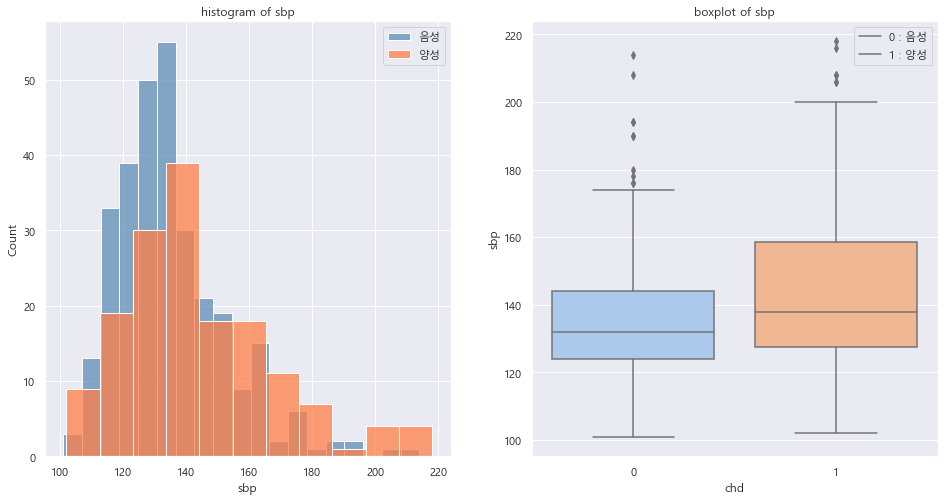

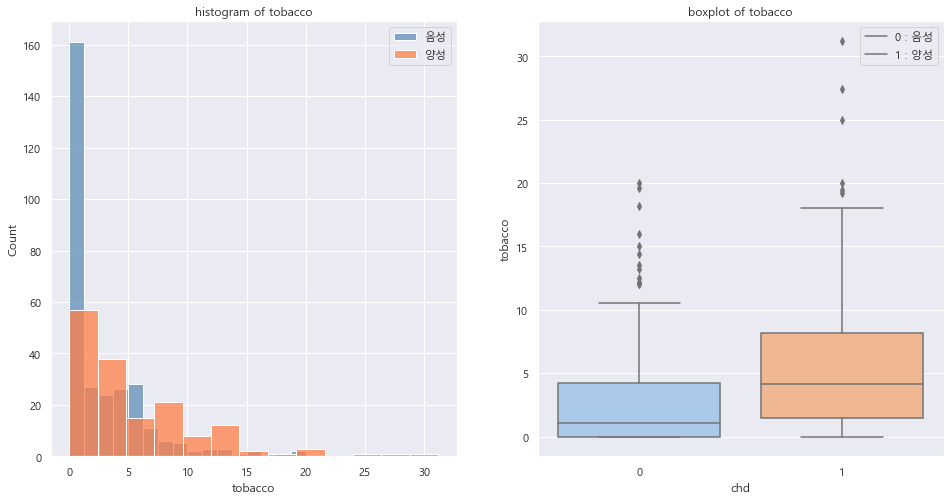

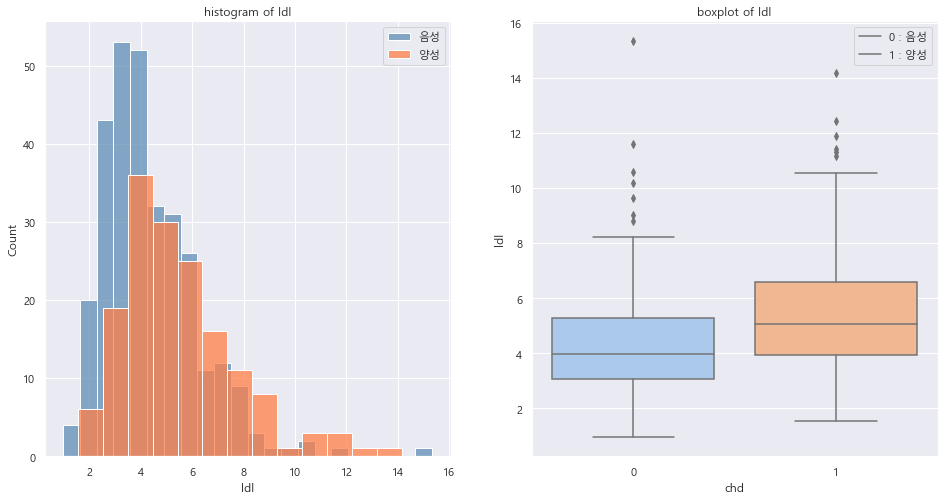

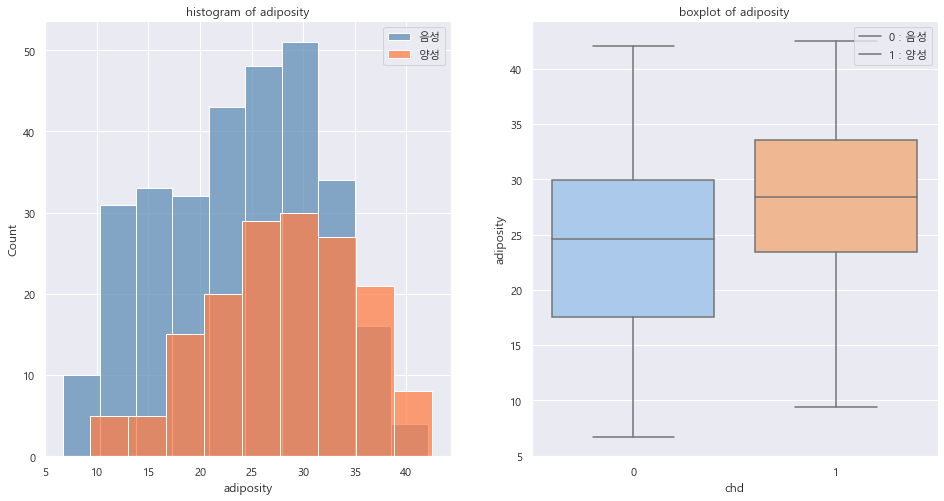

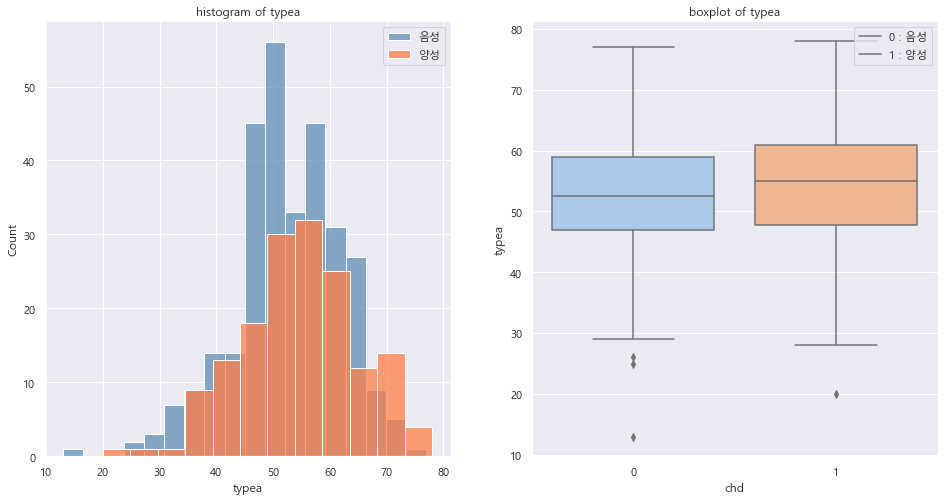

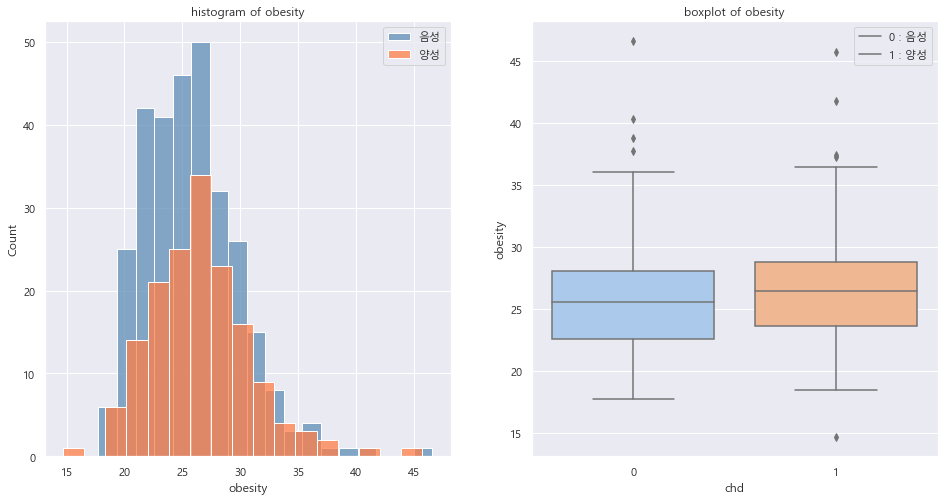

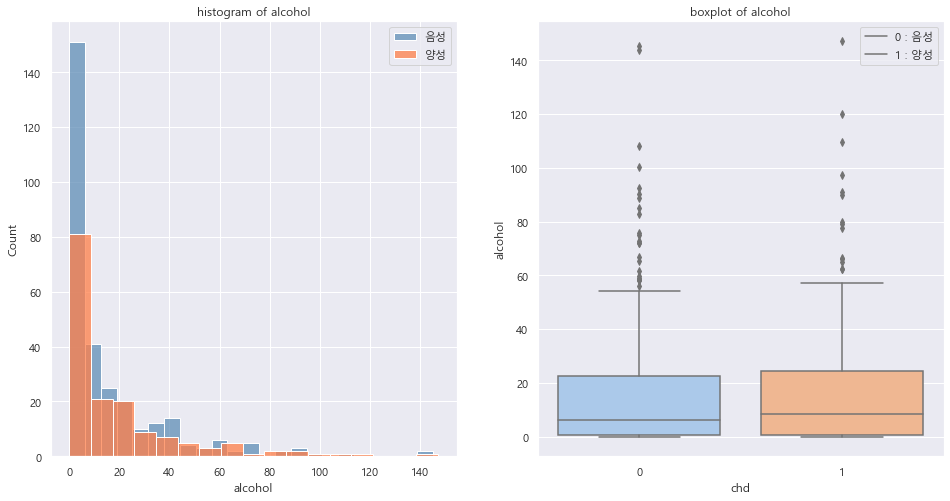

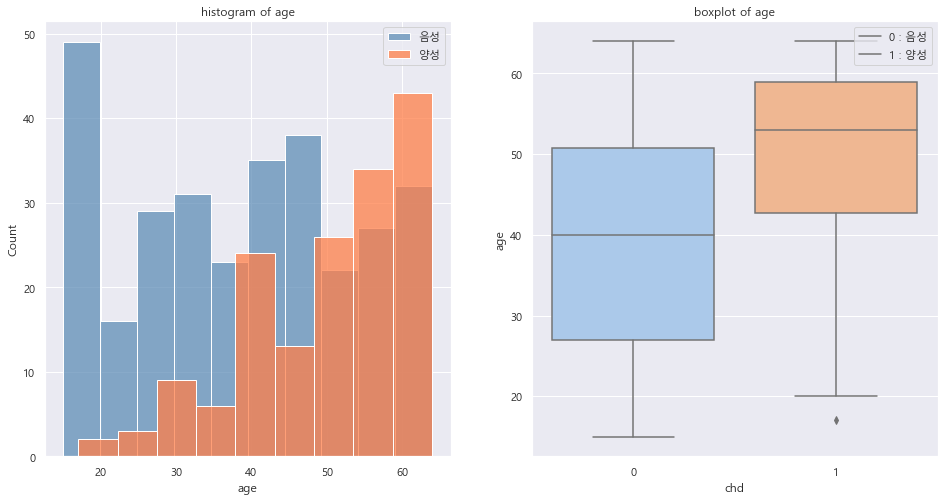

In [290]:
# 모든 변수 히스토그램 & 박스플랏
plt.rc('font', family='Malgun Gothic')
numeric_feature = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']



for col in numeric_feature:
    
        plt.figure(figsize=(16, 8))
 
        ax = plt.subplot(1,2,1)
        sns.histplot(data[col][data['chd']==0],color='#608EB7')
        sns.histplot(data[col][data['chd']==1],color='#FF7F49')
        plt.legend(['음성','양성'], loc='best')
        plt.title('histogram of '+str(col))
        
        ax = plt.subplot(1,2,2)
        sns.boxplot(x="chd",y= data[col],data=data,  palette = "pastel")
       
        plt.legend(['0 : 음성','1 : 양성'],loc=1)
        plt.title('boxplot of '+str(col))
        plt.show()

### 2-2. sbp

In [291]:
df = data.copy()

In [292]:
# sbp 단계에 따라 4단계 분류
# 출처 : 미국 심장협회(AHA)
df['sbp_level'] = 0

df.loc[df['sbp']<120,'sbp_level']='정상혈압'
df.loc[(df['sbp']>=120) & (df['sbp']<130),'sbp_level']='고혈압 전단계'
df.loc[(df['sbp']>=130) & (df['sbp']<140),'sbp_level']='고혈압 1기'
df.loc[df['sbp']>=140,'sbp_level']='고혈압 2기'

df['sbp_level']=df['sbp_level'].astype('category')

In [293]:
df['sbp_level'].value_counts().to_frame()

,sbp_level
고혈압 2기,172
고혈압 1기,121
고혈압 전단계,102
정상혈압,67


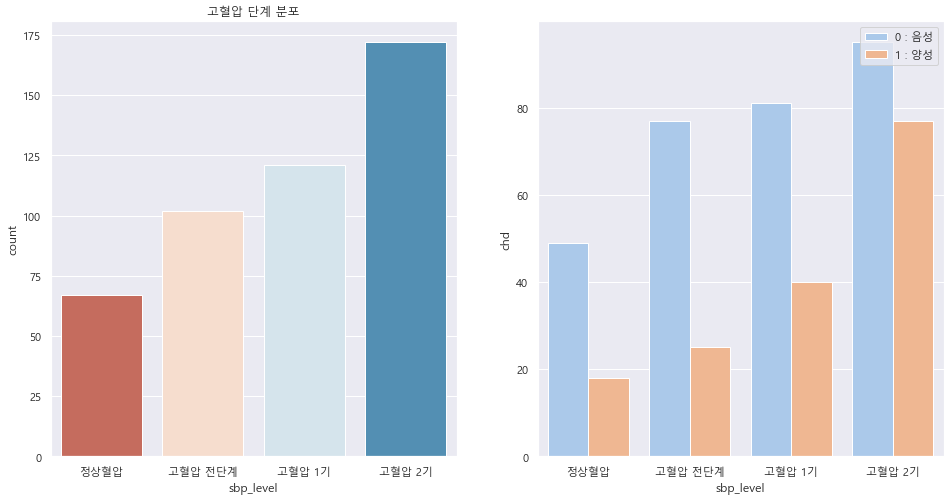

In [294]:
# 고혈압 단계 분포
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize = (16,8))

ax = plt.subplot(1,2,1)
sns.countplot(x="sbp_level", data=df,palette = "RdBu",order=['정상혈압','고혈압 전단계','고혈압 1기','고혈압 2기'])
plt.title('고혈압 단계 분포')

ax = plt.subplot(1,2,2)
cnt=sns.countplot(x='sbp_level',hue='chd',data=df,palette='pastel',order=['정상혈압','고혈압 전단계','고혈압 1기','고혈압 2기'])
cnt.set_ylabel("chd")
plt.legend(['0 : 음성','1 : 양성'],loc=1)

plt.show()

<Figure size 432x288 with 0 Axes>

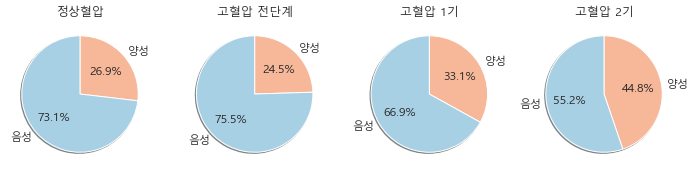

In [295]:
# 혈압 단계에 따른 chd 발병 여부
plt.rc('font', family='Malgun Gothic')
fig = plt.figure()
fig, ax_lst = plt.subplots(1,4,figsize=(12,8))

colors = sns.color_palette('RdBu',2)
sbp_level =['정상혈압','고혈압 전단계','고혈압 1기','고혈압 2기']
i=1
for col in sbp_level:
    tmp = df.loc[df['sbp_level']==col,:]
    plt.subplot(1,4,i)
    i+=1
    plt.pie([(tmp['chd']==1).sum(),(tmp['chd']==0).sum()], labels = ['양성', '음성'], autopct='%.1f%%', startangle=90, 
        counterclock=False, shadow=True, colors = colors)
    plt.title(col)
plt.show()

### 2-3. tobacco

In [296]:
# 왜도, 첨도
print(skew(df['tobacco'][df['chd']==0]))
print(kurtosis(df['tobacco'][df['chd']==0], fisher=True))

2.007066208906549
4.8486150277796245


In [297]:
print(skew(df['tobacco'][df['chd']==1]))
print(kurtosis(df['tobacco'][df['chd']==1], fisher=True))

1.7260847554858467
3.8971409198460663


In [298]:
df['smoker']=0

df.loc[(df['tobacco']==0) ,'smoker']= '비흡연'
df.loc[(df['tobacco']>0) ,'smoker']= '흡연'

df['smoker']=df['smoker'].astype('category')

df['smoker'].value_counts().to_frame()

,smoker
흡연,355
비흡연,107


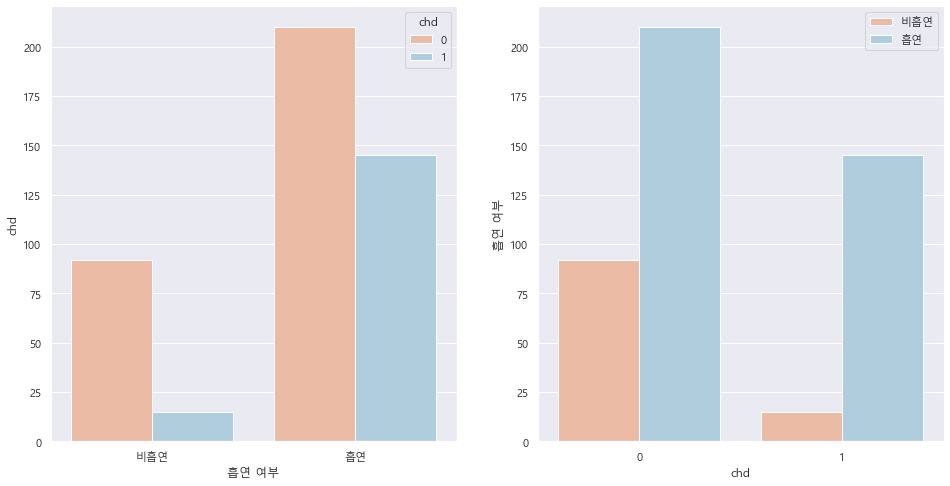

In [299]:
# 흡연, 비흡연에 따른 chd 발병 여부
plt.figure(figsize = (16,8))
plt.rc('font', family='Malgun Gothic')

ax = plt.subplot(1,2,1)
cnt=sns.countplot(x='smoker',hue='chd',data=df,palette='RdBu')
cnt.set_xlabel("흡연 여부")
cnt.set_ylabel("chd")

ax = plt.subplot(1,2,2)
cnt=sns.countplot(hue='smoker',x='chd',data=df,palette='RdBu')
plt.legend(['비흡연','흡연'], loc='best')
cnt.set_ylabel("흡연 여부")
cnt.set_xlabel("chd")

plt.show()

<Figure size 432x288 with 0 Axes>

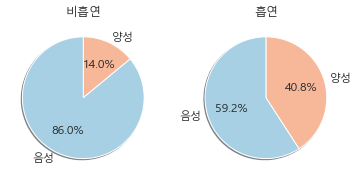

In [300]:
fig = plt.figure()
fig, ax_lst = plt.subplots(1,2,figsize=(6,6))
plt.rc('font', family='Malgun Gothic')
colors = sns.color_palette('RdBu',2)

smoker =['비흡연','흡연']

i=1
for col in smoker:
    tmp = df.loc[df['smoker']==col,:]
    plt.subplot(1,2,i)
    i+=1
    plt.pie([(tmp['chd']==1).sum(),(tmp['chd']==0).sum()], labels = ['양성', '음성'], autopct='%.1f%%', startangle=90, 
        counterclock=False, shadow=True, colors = colors)
    plt.title(col)

### 2-4. ldl

<Figure size 576x576 with 0 Axes>

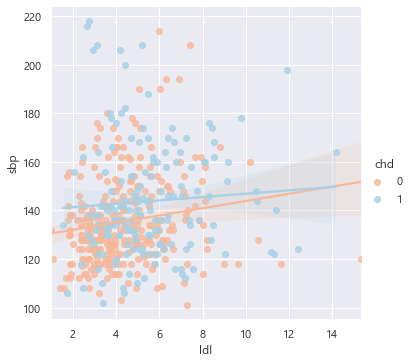

In [301]:
plt.figure(figsize = (8,8))

sns.lmplot(data = df, x = 'ldl', y = 'sbp',hue = 'chd',palette='RdBu')
plt.show()

In [302]:
# ldl 단계 생성
# 출처 : Mayo Clinic, US National Library of Medicine
df['ldl_level'] = 0

df.loc[df['ldl']<2.6069,'ldl_level']='최적'
df.loc[(df['ldl']>=2.6069) & (df['ldl']<3.3889),'ldl_level']='양호'
df.loc[(df['ldl']>=3.3889) & (df['ldl']<4.1710),'ldl_level']='경계'
df.loc[(df['ldl']>=4.1710) & (df['ldl']<4.9531),'ldl_level']='높음'
df.loc[df['ldl']>=4.9531,'ldl_level']='매우 높음'

df['ldl_level']=df['ldl_level'].astype('category')

In [303]:
df['ldl_level'].value_counts().to_frame()

,ldl_level
매우 높음,177
경계,87
양호,76
높음,70
최적,52


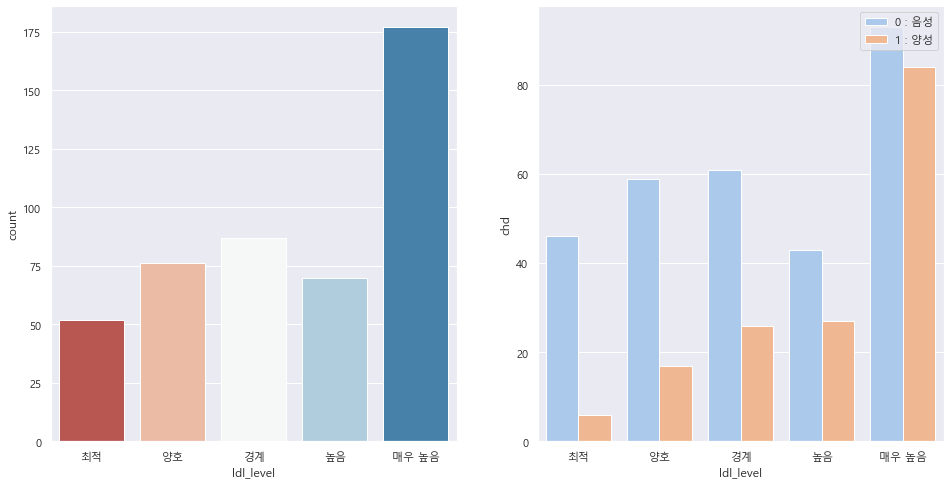

In [304]:
# ldl 단계에 따른 chd 발병 여부 
plt.figure(figsize = (16,8))

ax = plt.subplot(1,2,1)
sns.countplot(x="ldl_level", data=df, palette = "RdBu", order=['최적', '양호','경계','높음','매우 높음'])


ax = plt.subplot(1,2,2)
cnt=sns.countplot(x='ldl_level',hue='chd',data=df,palette='pastel', order=['최적', '양호','경계','높음','매우 높음'])
cnt.set_ylabel("chd")
plt.legend(['0 : 음성','1 : 양성'],loc=1)


plt.show()

<Figure size 432x288 with 0 Axes>

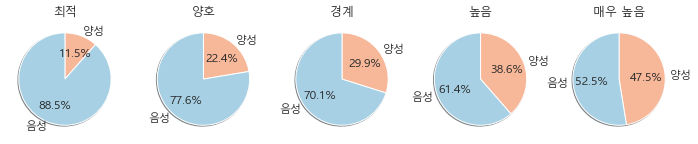

In [305]:
fig = plt.figure()
fig, ax_lst = plt.subplots(1,5,figsize=(12,8))
plt.rc('font', family='Malgun Gothic')

colors = sns.color_palette('RdBu',2)
ldl_level =['최적', '양호','경계','높음','매우 높음']
i=1
for col in ldl_level:
    tmp = df.loc[df['ldl_level']==col,:]
    plt.subplot(1,5,i)
    i+=1
    plt.pie([(tmp['chd']==1).sum(),(tmp['chd']==0).sum()], labels = ['양성', '음성'], autopct='%.1f%%', startangle=90, 
        counterclock=False, shadow=True, colors = colors)
    plt.title(col)
plt.show()

In [306]:
print(skew(df['ldl'][df['chd']==0]))
print(kurtosis(df['ldl'][df['chd']==0], fisher=True))

print(skew(df['ldl'][df['chd']==1]))
print(kurtosis(df['ldl'][df['chd']==1], fisher=True))

1.425174608385048
4.188754594292101
1.138633335866541
1.584542793390515


### 2-5. adiposity

In [307]:
# 시각화를 위한 adiposity 범주화 변수 생성
df.loc[(df['adiposity']<10.67) ,'adiposity2'] = '저체중'
df.loc[(10.67<=df['adiposity']) & (df['adiposity']<23),'adiposity2'] = '정상'
df.loc[(23<=df['adiposity']) & (df['adiposity']<28.67),'adiposity2'] = '과체중'
df.loc[(28.67<=df['adiposity']), 'adiposity2'] = '비만'

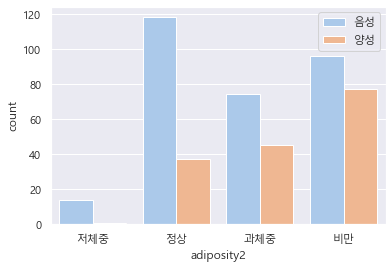

In [308]:
# 그룹 별 양성 환자 빈도
sns.set()
plt.rc('font', family='Malgun Gothic')
sns.countplot(x='adiposity2',hue='chd',data=df,order=['저체중','정상','과체중','비만'],palette="pastel")
plt.legend(loc='best', labels=['음성', '양성'])
plt.show()

#plt.savefig('age_bar.png')

<Figure size 432x288 with 0 Axes>

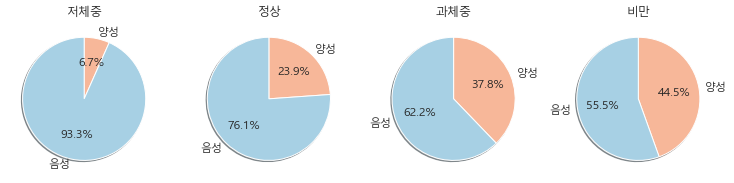

In [309]:
# adiposity2 chd 발병 비율
fig = plt.figure()
fig, ax_lst = plt.subplots(1,4,figsize=(16,8))

colors = sns.color_palette('RdBu',2)

adiposity2 = ['저체중','정상','과체중','비만']
i=1
for col in adiposity2:
    tmp = df.loc[df['adiposity2']==col,:]
    plt.subplot(1,5,i)
    i+=1
    plt.pie([(tmp['chd']==1).sum(),(tmp['chd']==0).sum()], labels = ['양성', '음성'], autopct='%.1f%%', startangle=90, 
        counterclock=False, shadow=True, colors=colors)
    plt.title(col)
plt.show()

### 2-6. famhist

Text(0, 0.5, 'chd')

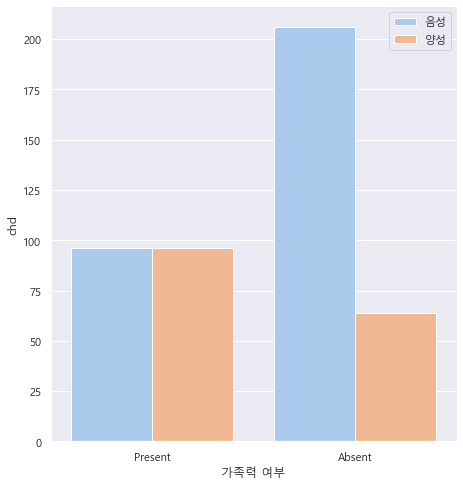

In [310]:
plt.figure(figsize = (16,8))
plt.rc('font', family='Malgun Gothic')

ax = plt.subplot(1,2,1)
cnt=sns.countplot(x='famhist',hue='chd',data=df,palette='pastel')
plt.legend(['음성','양성'], loc='best')
cnt.set_xlabel("가족력 여부")
cnt.set_ylabel("chd")

<Figure size 432x288 with 0 Axes>

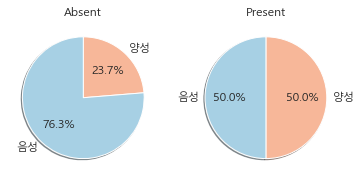

In [311]:
fig = plt.figure()
fig, ax_lst = plt.subplots(1,2,figsize=(6,6))
plt.rc('font', family='Malgun Gothic')

colors = sns.color_palette('RdBu',len(smoker))

famhist =['Absent','Present']

i=1
for col in famhist:
    tmp = df.loc[df['famhist']==col,:]
    plt.subplot(1,2,i)
    i+=1
    plt.pie([(tmp['chd']==1).sum(),(tmp['chd']==0).sum()], labels = ['양성', '음성'], autopct='%.1f%%', startangle=90, 
        counterclock=False, shadow=True, colors = colors)
    plt.title(col)

### 2-7. obesity

In [312]:
# 시각화를 위한 비만 범주화 변수 생성
# 출처 : 세계보건기구 비만 기준
df.loc[(df['obesity']<18.5) ,'obesity2'] = '저체중'
df.loc[(18.5<=df['obesity']) & (df['obesity']<25),'obesity2'] = '정상'
df.loc[(25<=df['obesity']) & (df['obesity']<30),'obesity2'] = '과체중'
df.loc[(30<=df['obesity']), 'obesity2'] = '비만'

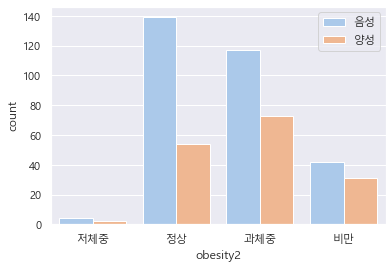

In [313]:
# 연령 그룹 별 양성 환자 빈도
sns.set()
plt.rc('font', family='Malgun Gothic')
sns.countplot(x='obesity2',hue='chd',data=df,order=['저체중','정상','과체중','비만'],palette="pastel")
plt.legend(loc='best', labels=['음성', '양성'])
plt.show()

#plt.savefig('age_bar.png')

<Figure size 432x288 with 0 Axes>

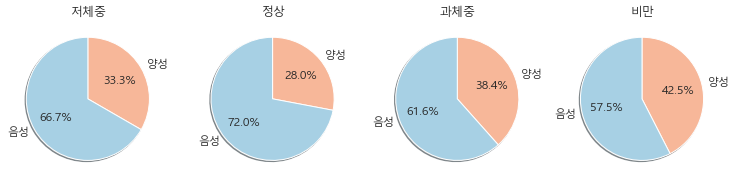

In [314]:
# obesity2 chd 발병 비율
fig = plt.figure()
fig, ax_lst = plt.subplots(1,4,figsize=(16,8))

colors = sns.color_palette('RdBu',2)

obesity2 = ['저체중','정상','과체중','비만']
i=1
for col in obesity2:
    tmp = df.loc[df['obesity2']==col,:]
    plt.subplot(1,5,i)
    i+=1
    plt.pie([(tmp['chd']==1).sum(),(tmp['chd']==0).sum()], labels = ['양성', '음성'], autopct='%.1f%%', startangle=90, 
        counterclock=False, shadow=True, colors=colors)
    plt.title(col)
plt.show()

### 2-8. alcohol

In [315]:
#alcohol 섭취정도별 양/음성 비율
df['y_alcohol']='미섭취'
df.loc[(df['alcohol']>0),'y_alcohol']= '섭취'

df['h_alcohol']='정상섭취'
df.loc[(df['alcohol']>23.89),'h_alcohol']= '과섭취'

<Figure size 432x288 with 0 Axes>

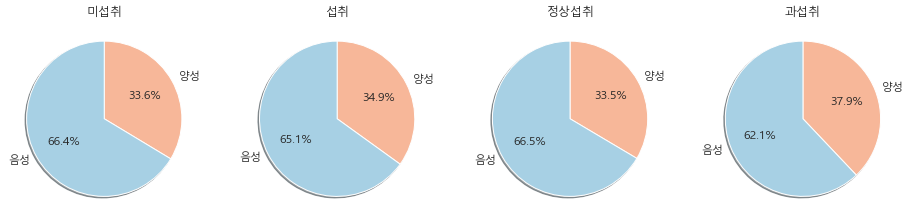

In [316]:
fig = plt.figure()
fig, ax_lst = plt.subplots(1,4,figsize=(16,8))

colors = sns.color_palette('RdBu',2)

y_alcohol =['미섭취','섭취']
h_alcohol =['정상섭취','과섭취']

i=1
for col in y_alcohol:
    tmp = df.loc[df['y_alcohol']==col,:]
    plt.subplot(1,4,i)
    i+=1
    plt.pie([(tmp['chd']==1).sum(),(tmp['chd']==0).sum()], labels = ['양성', '음성'], autopct='%.1f%%', startangle=90, 
        counterclock=False, shadow=True, colors = colors)
    plt.title(col)

i=3
for col in h_alcohol:
    tmp = df.loc[df['h_alcohol']==col,:]
    plt.subplot(1,4,i)
    i+=1
    plt.pie([(tmp['chd']==1).sum(),(tmp['chd']==0).sum()], labels = ['양성', '음성'], autopct='%.1f%%', startangle=90, 
        counterclock=False, shadow=True, colors = colors)
    plt.title(col)

    
plt.savefig('alcohol_pie.png')   

### 2-9. age

In [317]:
df['ages']=0

df.loc[(df['age']<=19) ,'ages']='10s'
df.loc[(df['age']>=20) & (df['age']<=29) ,'ages']='20s'
df.loc[(df['age']>=30) & (df['age']<=39) ,'ages']='30s'
df.loc[(df['age']>=40) & (df['age']<=49),'ages']='40s'
df.loc[(df['age']>=50) & (df['age']<=59) ,'ages']='50s'
df.loc[(df['age']>=60) & (df['age']<=69),'ages']='60s'
df['ages']=df['ages'].astype('category')

df['ages'].value_counts().to_frame()

,ages
50s,116
40s,106
30s,75
60s,64
20s,51
10s,50


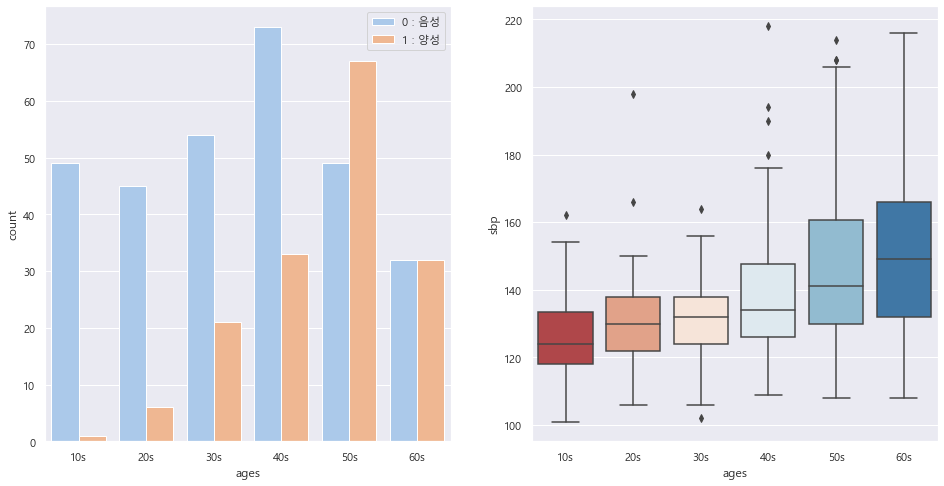

In [318]:
# 나이에 따른 chd 발병 여부
plt.figure(figsize = (16,8))

ax = plt.subplot(1,2,1)
cnt=sns.countplot(x='ages',hue='chd',data=df,palette='pastel')
plt.legend(['0 : 음성','1 : 양성'],loc=1)

ax = plt.subplot(1,2,2)
box=sns.boxplot(y='sbp',x='ages',data=df,palette='RdBu')

<Figure size 432x288 with 0 Axes>

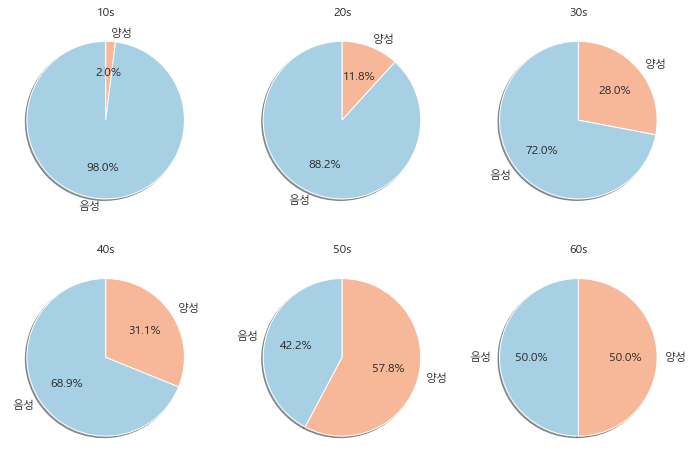

In [319]:
# 연령별 chd 발병 비율
fig = plt.figure()
fig, ax_lst = plt.subplots(2,3,figsize=(12,8))

colors = sns.color_palette('RdBu',2)

ages = ['10s','20s','30s','40s','50s','60s']

i=1
for col in ages:
    tmp = df.loc[df['ages']==col,:]
    plt.subplot(2,3,i)
    i+=1
    plt.pie([(tmp['chd']==1).sum(),(tmp['chd']==0).sum()], labels = ['양성', '음성'], autopct='%.1f%%', startangle=90, 
        counterclock=False, shadow=True, colors=colors)
    plt.title(col)
plt.show()

## 3. Data Preprocessing

### 3-1. Check Missing Values

In [320]:
# 결측치 없음
data.isnull().sum()

row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

### 3-2. Outlier

<Figure size 432x288 with 0 Axes>

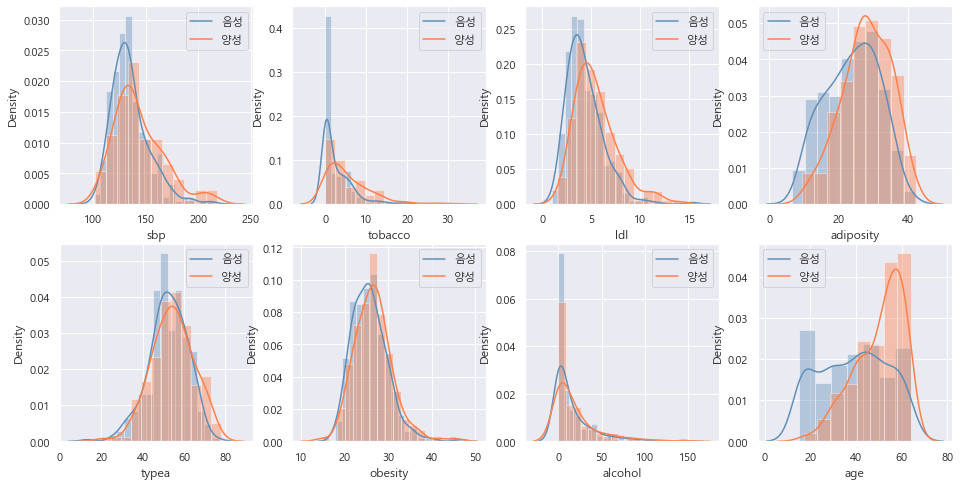

In [321]:
# 전체적인 데이터 분포
fig = plt.figure()
fig, ax_lst = plt.subplots(2,4,figsize=(16,8))
plt.rc('font', family='Malgun Gothic')
numeric_feature = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']
i=1
for col in numeric_feature:
    
        plt.subplot(2,4,i)
 
        sns.distplot(data[col][data['chd']==0],color='#608EB7')
        sns.distplot(data[col][data['chd']==1],color='#FF7F49')
        plt.legend(['음성','양성'],loc='best')
        #plt.title('histogram of '+str(col))
        i+=1
plt.show()

### 3-2. 1) alcohol & tobacco features

In [322]:
data[['alcohol','tobacco']].describe()

,alcohol,tobacco
count,462.000000,462.000000
mean,17.044394,3.635649
std,24.481059,4.593024
min,0.000000,0.000000
25%,0.510000,0.052500
50%,7.510000,2.000000
75%,23.892500,5.500000
max,147.190000,31.200000


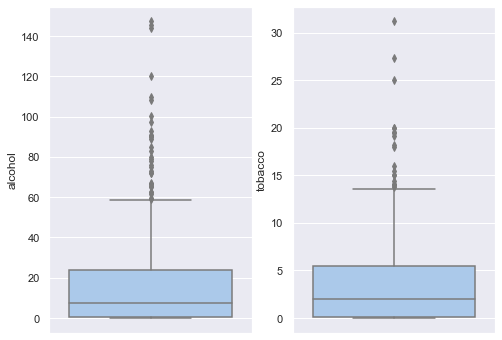

In [323]:
# 두 변수는 0에 밀집해있지만, 최대값은 매우 크게 분포
# alcohol, tobacco 히스토그램도 같이 보여주며 설명하기
sns.set()
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
sns.boxplot(y=data['alcohol'],palette="pastel")
plt.subplot(1,2,2)
sns.boxplot(y=data['tobacco'],palette="pastel")

In [324]:
# 95% percentile 이상의 값은 95% percentile로 대체하는 함수
def percentile_95(data,colname):
    value_95 = data.describe(percentiles=[.95])[colname]['95%']
    data.loc[data[colname]>=value_95,colname] = value_95

In [325]:
# alcohol변수와 tobacco변수에 적용
percentile_95(data,'alcohol')
percentile_95(data,'tobacco')

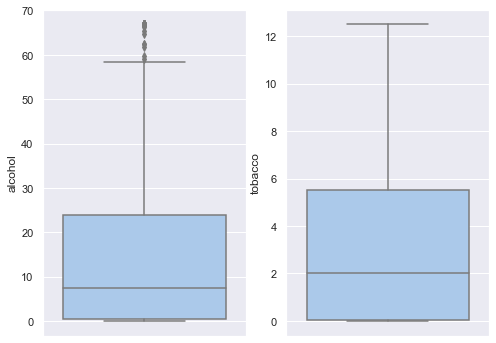

In [326]:
# 함수 적용 후 boxplot
sns.set()
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
sns.boxplot(y=data['alcohol'],palette="pastel")
plt.subplot(1,2,2)
sns.boxplot(y=data['tobacco'],palette="pastel")

### 3-2. 2) adiposity & obesity features

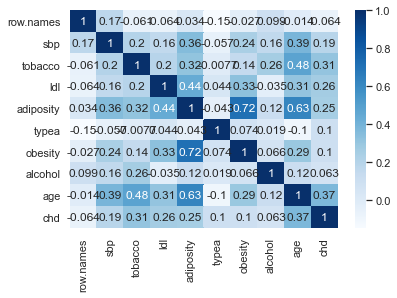

In [327]:
# 변수 별 상관관계 확인
# adiposity(지방)과 obesity(비만) 0.72
corr = data.corr()
sns.heatmap(corr,cmap = 'Blues',annot = True)
plt.show()

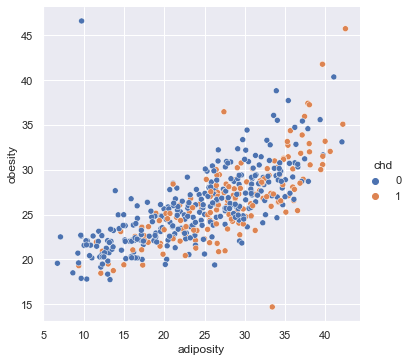

In [328]:
# 상관계수 높은 adiposity와 obeisity의 scatter plot
# 지방과 비만 변수가 어느 정도 상관관계가 있어야 함을 이용하여, 두 변수의 비율이 극단적이라면 이상치로 간주
# +'양성','음성' 범주 넣어주기
sns.relplot(x="adiposity", y="obesity", hue="chd",  data=data)

In [329]:
# 지방/비만 & 비만/지방 변수 생성
data['weight_rate1'] = data['adiposity'] / data['obesity']
data['weight_rate2'] = data['obesity'] / data['adiposity'] 

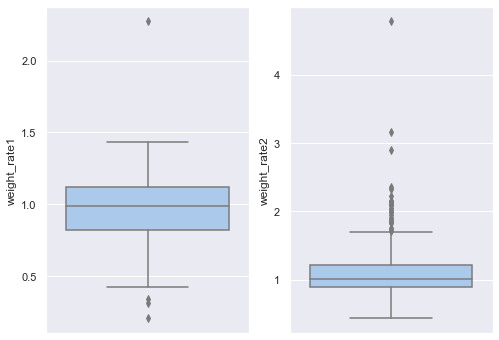

In [330]:
# 각각 2.0 이상, 4.0 이상 관측치를 이상치로 간주하고 제거
sns.set()
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
sns.boxplot(y=data['weight_rate1'],palette="pastel")
plt.subplot(1,2,2)
sns.boxplot(y=data['weight_rate2'],palette="pastel")

In [331]:
# weight_rate1,2 이상치 제거
data = data[data['weight_rate1']<=2]
data = data[data['weight_rate2']<=4]

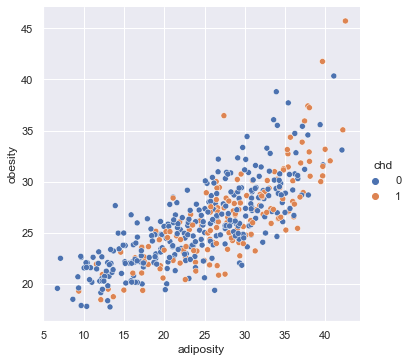

In [332]:
# 2obs 제거된 모습
# '양성','음성' 범주 넣어주기2
sns.relplot(x="adiposity", y="obesity", hue="chd",  data=data)

In [333]:
# 필요없어진 변수 제거
data = data.drop(["weight_rate1","weight_rate2"],axis=1)

### 3-3. Drop Column

In [334]:
# row.names 열 제거
plt.show()
data = data.drop('row.names',axis=1)
data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,66.8495,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.0600,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.8100,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.2600,58,1
4,134,12.49,3.50,27.78,Present,60,25.99,57.3400,49,1
...,...,...,...,...,...,...,...,...,...,...
456,170,0.40,4.11,42.06,Present,56,33.10,2.0600,57,0
457,214,0.40,5.98,31.72,Absent,64,28.45,0.0000,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.7200,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.6400,55,0


### 3-4. Add Column

In [335]:
# 시각화를 위한 나이 범주화 변수 생성 (분석에 사용 x)
data.loc[(10<=data['age']) & (data['age']<20),'ages'] = '10s'
data.loc[(20<=data['age']) & (data['age']<30),'ages'] = '20s'
data.loc[(30<=data['age']) & (data['age']<40),'ages'] = '30s'
data.loc[(40<=data['age']) & (data['age']<50),'ages'] = '40s'
data.loc[(50<=data['age']) & (data['age']<60),'ages'] = '50s'
data.loc[(60<=data['age']) & (data['age']<70),'ages'] = '60s'

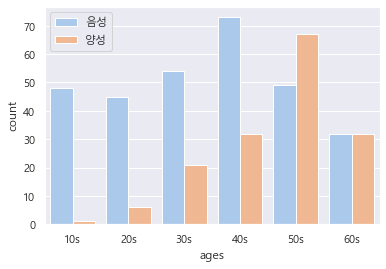

In [336]:
# 연령 그룹 별 양성 환자 빈도
sns.set()
plt.rc('font', family='Malgun Gothic')
sns.countplot(x='ages',hue='chd',data=data,order=['10s','20s','30s','40s','50s','60s'],palette="pastel")
plt.legend(loc='best', labels=['음성', '양성'])
plt.show()

In [337]:
# 연령이 높을수록 면역력이 떨어져 질병에 취약
# sbp도 연령 영향 받음

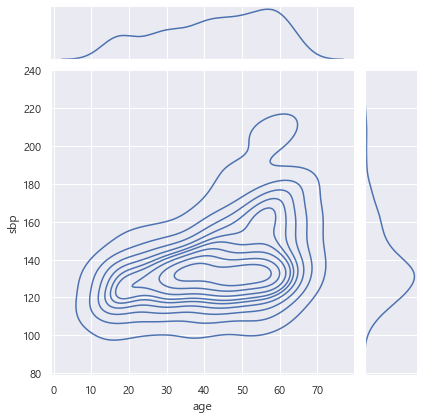

In [338]:
# x축 : age / y축 : sbp 플랏
# 나이가 적을 때 고혈압 거의 없음
sns.jointplot(x="age", y="sbp", data=data, kind="kde")
plt.show()

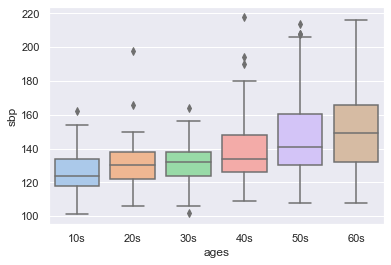

In [339]:
# 연령별 sbp 박스플랏
# -> 연령에 따라 sbp 값 분포 차이 있음
# 나이가 들수록 혈관의 탄력성이 떨어지고 굳어감
# -> 나이 요인을 통제하고 sbp가 어느 정도인지 파악하는 변수 'sbp_rel' 생성
sns.set()
sns.set_color_codes()
#sns.set_style("whitegrid")
sns.boxplot(x="ages", y="sbp", data=data, palette="pastel",order=['10s','20s','30s','40s','50s','60s'])

In [340]:
# 나이별 상대 sbp 변수 생성
# 출처 : https://www.onhealth.com/content/1/blood_pressure_chart_reading_range_age_men_women 
sbp = [120,120.5,119.5,114.5,120.5,115.5,119.5,125.5,129.5,143.5]
age = list(range(15,65,5))

for i in range(len(age)):
    data.loc[(data['age']>=age[i]) & (data['age']<(age[i]+5)),'sbp_rel'] = data.loc[
        (data['age']>=age[i]) & (data['age']<(age[i]+5))]['sbp'] - sbp[i]

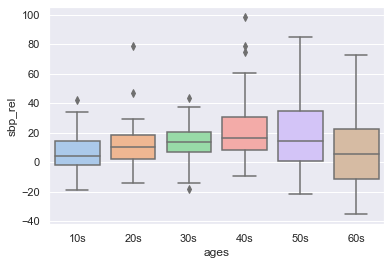

In [341]:
sns.set()
sns.set_color_codes()
#sns.set_style("whitegrid")
sns.boxplot(x="ages", y="sbp_rel", data=data, palette="pastel",order=['10s','20s','30s','40s','50s','60s'])

In [342]:
data = data.drop('ages',axis=1)

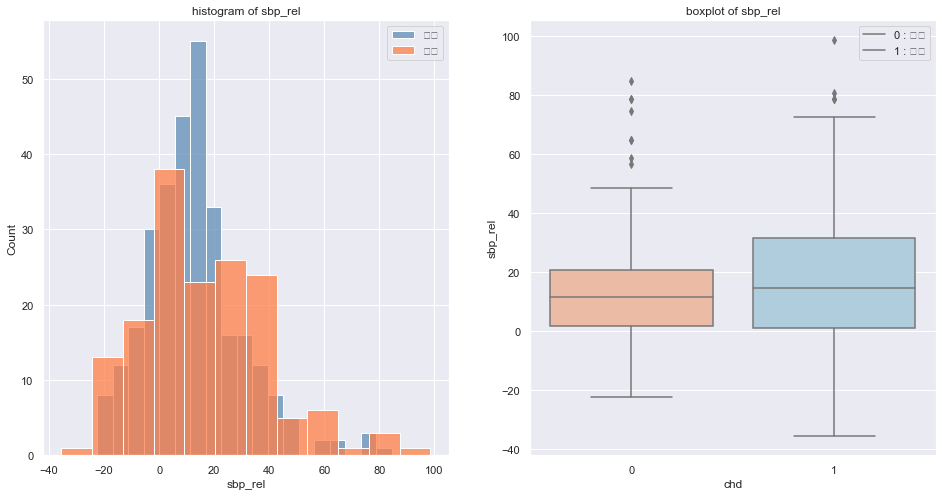

In [343]:
plt.figure(figsize=(16, 8))
 
ax = plt.subplot(1,2,1)
sns.histplot(data['sbp_rel'][data['chd']==0],color='#608EB7')
sns.histplot(data['sbp_rel'][data['chd']==1],color='#FF7F49')
plt.legend(['음성','양성'], loc='best')
plt.title('histogram of sbp_rel')
        
ax = plt.subplot(1,2,2)
sns.boxplot(x="chd",y= data['sbp_rel'],data=data,  palette = "RdBu")
       
plt.legend(['0 : 음성','1 : 음성'],loc=1)
plt.title('boxplot of sbp_rel')
plt.show()

### 3-6. VIF

In [344]:
# 수치형 변수
data_vif = data[['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age','sbp_rel']].copy()

In [345]:
# 다중공선성 확인 함수
def vif(data):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(data_vif.values, i) 
                         for i in range(data_vif.shape[1])]
    vif["features"] = data_vif.columns
    return vif.sort_values(by="VIF Factor", ascending=False)

In [346]:
# obesity 변수 VIF값 제일 높음
vif(data_vif)

,VIF Factor,features
5,107.295706,obesity
0,101.065930,sbp
3,50.507558,adiposity
4,29.271284,typea
7,27.757084,age
2,7.929405,ldl
8,4.129590,sbp_rel
1,2.529237,tobacco
6,1.821648,alcohol


In [347]:
# obesity 변수 제거
data = data.drop('obesity',axis=1)

In [348]:
# obesity 제거 후 낮아진 VIF
# 하지만 여전히 sbp 변수의 VIF값이 높음
data_vif = data[['sbp','tobacco','ldl','adiposity','typea','alcohol','age','sbp_rel']].copy()
vif(data_vif)

,VIF Factor,features
0,64.859845,sbp
4,26.966601,typea
6,23.682871,age
3,22.212165,adiposity
2,7.906633,ldl
7,3.361204,sbp_rel
1,2.524434,tobacco
5,1.820862,alcohol


In [349]:
# sbp 변수 제거
data = data.drop('sbp',axis=1)

In [350]:
# 최종적으로 obesity, sbp 변수 제거
# 이는 adiposity, sbp_rel로 어느 정도 설명 가능
data_vif = data[['tobacco','ldl','adiposity','typea','alcohol','age','sbp_rel']].copy()
vif(data_vif)

,VIF Factor,features
2,21.762682,adiposity
5,17.461977,age
3,9.696577,typea
1,7.888195,ldl
0,2.460869,tobacco
4,1.819809,alcohol
6,1.667994,sbp_rel


### 3-5. Replace Values

In [351]:
# mapping
data = data.replace("Present",1).replace("Absent",0)

### 최종 데이터

In [352]:
data

,tobacco,ldl,adiposity,famhist,typea,alcohol,age,chd,sbp_rel
0,12.00,5.73,23.11,1,49,66.8495,52,1,34.5
1,0.01,4.41,28.61,0,55,2.0600,63,1,0.5
2,0.08,3.48,32.28,1,52,3.8100,46,0,-1.5
3,7.50,6.41,38.03,1,51,24.2600,58,1,40.5
4,12.49,3.50,27.78,1,60,57.3400,49,1,14.5
...,...,...,...,...,...,...,...,...,...
456,0.40,4.11,42.06,1,56,2.0600,57,0,40.5
457,0.40,5.98,31.72,0,64,0.0000,58,0,84.5
458,4.20,4.41,32.10,0,52,18.7200,52,1,56.5
459,3.00,1.59,15.23,0,40,26.6400,55,0,-21.5


## 4. Modeling

In [353]:
# xcol : 설명변수 (필요하면 각각 써주기)
# ycol : 반응변수
xcol = data.columns[data.columns!='chd']
ycol = 'chd'

In [354]:
data_x = data[xcol]
data_y = data[ycol]

In [355]:
# 설명변수와 반응변수 각각 3:7 비율로 train, test set 분리
# stratify : 계층적 데이터 추출 옵션
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, stratify=data_y, random_state=123456)

In [356]:
# 교차검증 : 학습 데이터셋을 바꿔가며 훈련하면서 평균을 정확도로 보는 방법
# 학습 데이터에 과도하게 초점이 맞춰지는 과적합 (Overfitting) 방지
# Stratifiedkfold : 분류 시, 레이블 값의 분포 반영
skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=123456)

In [357]:
# Accuracy : 데이터가 balanced 할 때, 효과적
# 따라서 F1 score 사용

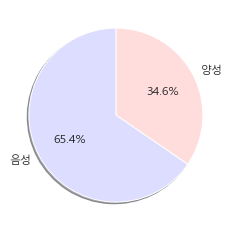

In [358]:
# 약 2/3 정도가 chd 환자 -> imbalanced
plt.rc('font', family='Malgun Gothic')
plt.pie([(data['chd']==1).sum(),(data['chd']==0).sum()], labels = ['양성', '음성'], autopct='%.1f%%', startangle=90, 
        counterclock=False, shadow=True, colors=['#FFDDDD','#DDDDFF'])
plt.show()

In [359]:
# 파이프를 이용하여 3개의 모델 중 f1_score 가장 높은 모델 선정 
# + grid search도 동시에

pipe = Pipeline([('classifier', LogisticRegression())])
warnings.filterwarnings(action='ignore')
param_grid = [{'classifier': [SVC()], 
              'classifier__gamma': [0.01, 0.1, 1, 10], 
              'classifier__C': [0.01, 0.1, 1, 10]
              },

               {'classifier': [LogisticRegression()],
               'classifier__penalty': ['l1', 'l2','elasticnet'], 
               'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
               },

              {'classifier': [RandomForestClassifier()],
              'classifier__max_depth': [4, 6, 8], 
              'classifier__n_estimators': [10, 50, 100], 
              'classifier__min_samples_split': [10,100]
              }]

grid = GridSearchCV(pipe, param_grid, scoring = 'f1', cv=skf)  
grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'classifier': LogisticRegression(C=0.1), 'classifier__C': 0.1, 'classifier__penalty': 'l2'}
0.5907742016437668


In [360]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123456, shuffle=True),
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [SVC()],
                          'classifier__C': [0.01, 0.1, 1, 10],
                          'classifier__gamma': [0.01, 0.1, 1, 10]},
                         {'classifier': [LogisticRegression(C=0.1)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__penalty': ['l1', 'l2', 'elasticnet']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [4, 6, 8],
                          'classifier__min_samples_split': [10, 100],
                          'classifier__n_estimators': [10, 50, 100]}],
             scoring='f1')

In [361]:
model = LogisticRegression(penalty=grid.best_params_['classifier__penalty'],C=grid.best_params_['classifier__C'])

In [362]:
model.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [363]:
pred = model.predict(x_test)

In [364]:
# accuracy는 71 정도
round(sum(pred==y_test)/len(pred),2)

0.71

In [365]:
# 최종 모델 선정 완료

In [366]:
col1 = pd.concat([pd.DataFrame(['intercept']),pd.DataFrame(x_train.columns)])
col2 = pd.concat([pd.DataFrame(model.intercept_),pd.DataFrame(model.coef_).T],axis=0)
coef = pd.concat([col1,col2],axis=1)
coef.columns = ['columns','coef']
coef

,columns,coef
0,intercept,-6.441970
0,tobacco,0.087575
1,ldl,0.113534
2,adiposity,-0.017431
3,famhist,0.631283
4,typea,0.037659
5,alcohol,-0.002854
6,age,0.065183
7,sbp_rel,0.004407


In [367]:
# 변수 중요도는 scaling (표준화) 후 로지스틱 회귀 계수를 보고 판단

In [368]:
m = LogisticRegression(penalty=grid.best_params_['classifier__penalty'],C=grid.best_params_['classifier__C'])

In [369]:
scaler = StandardScaler()

In [370]:
x_train_scale =  scaler.fit_transform(x_train)
x_test_scale =  scaler.transform(x_test)

In [371]:
m.fit(x_train_scale, y_train)

LogisticRegression(C=0.1)

In [372]:
col1_scale = pd.concat([pd.DataFrame(['intercept']),pd.DataFrame(x_train.columns)])
col2_scale = pd.concat([pd.DataFrame(m.intercept_),pd.DataFrame(m.coef_).T],axis=0)
coef_scale = pd.concat([col1_scale,col2_scale],axis=1)
coef_scale.columns = ['columns_scale','coef']
coef_scale

,columns_scale,coef
0,intercept,-0.845355
0,tobacco,0.328977
1,ldl,0.207478
2,adiposity,-0.026989
3,famhist,0.452744
4,typea,0.281083
5,alcohol,-0.053249
6,age,0.665992
7,sbp_rel,0.054462


In [373]:
# 인사이트 도출